In [ ]:
## for data
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from pandas.api.types import CategoricalDtype
from plotnine import *

In [ ]:
ddf = pd.read_csv('diabetes.csv')
ddf.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [ ]:
ddf.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
ddf['Body mass index'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: Body mass index, Length: 248, dtype: int64

In [ ]:
ddf['Number of times pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Number of times pregnant, dtype: int64

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
ddf.isnull().any()

Number of times pregnant        False
Plasma glucose concentration    False
Diastolic blood pressure        False
Triceps skin fold thickness     False
2-Hour serum insulin            False
Body mass index                 False
Diabetes pedigree function      False
Age                             False
Class                           False
dtype: bool

In [ ]:
ddf.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class                           0
dtype: int64

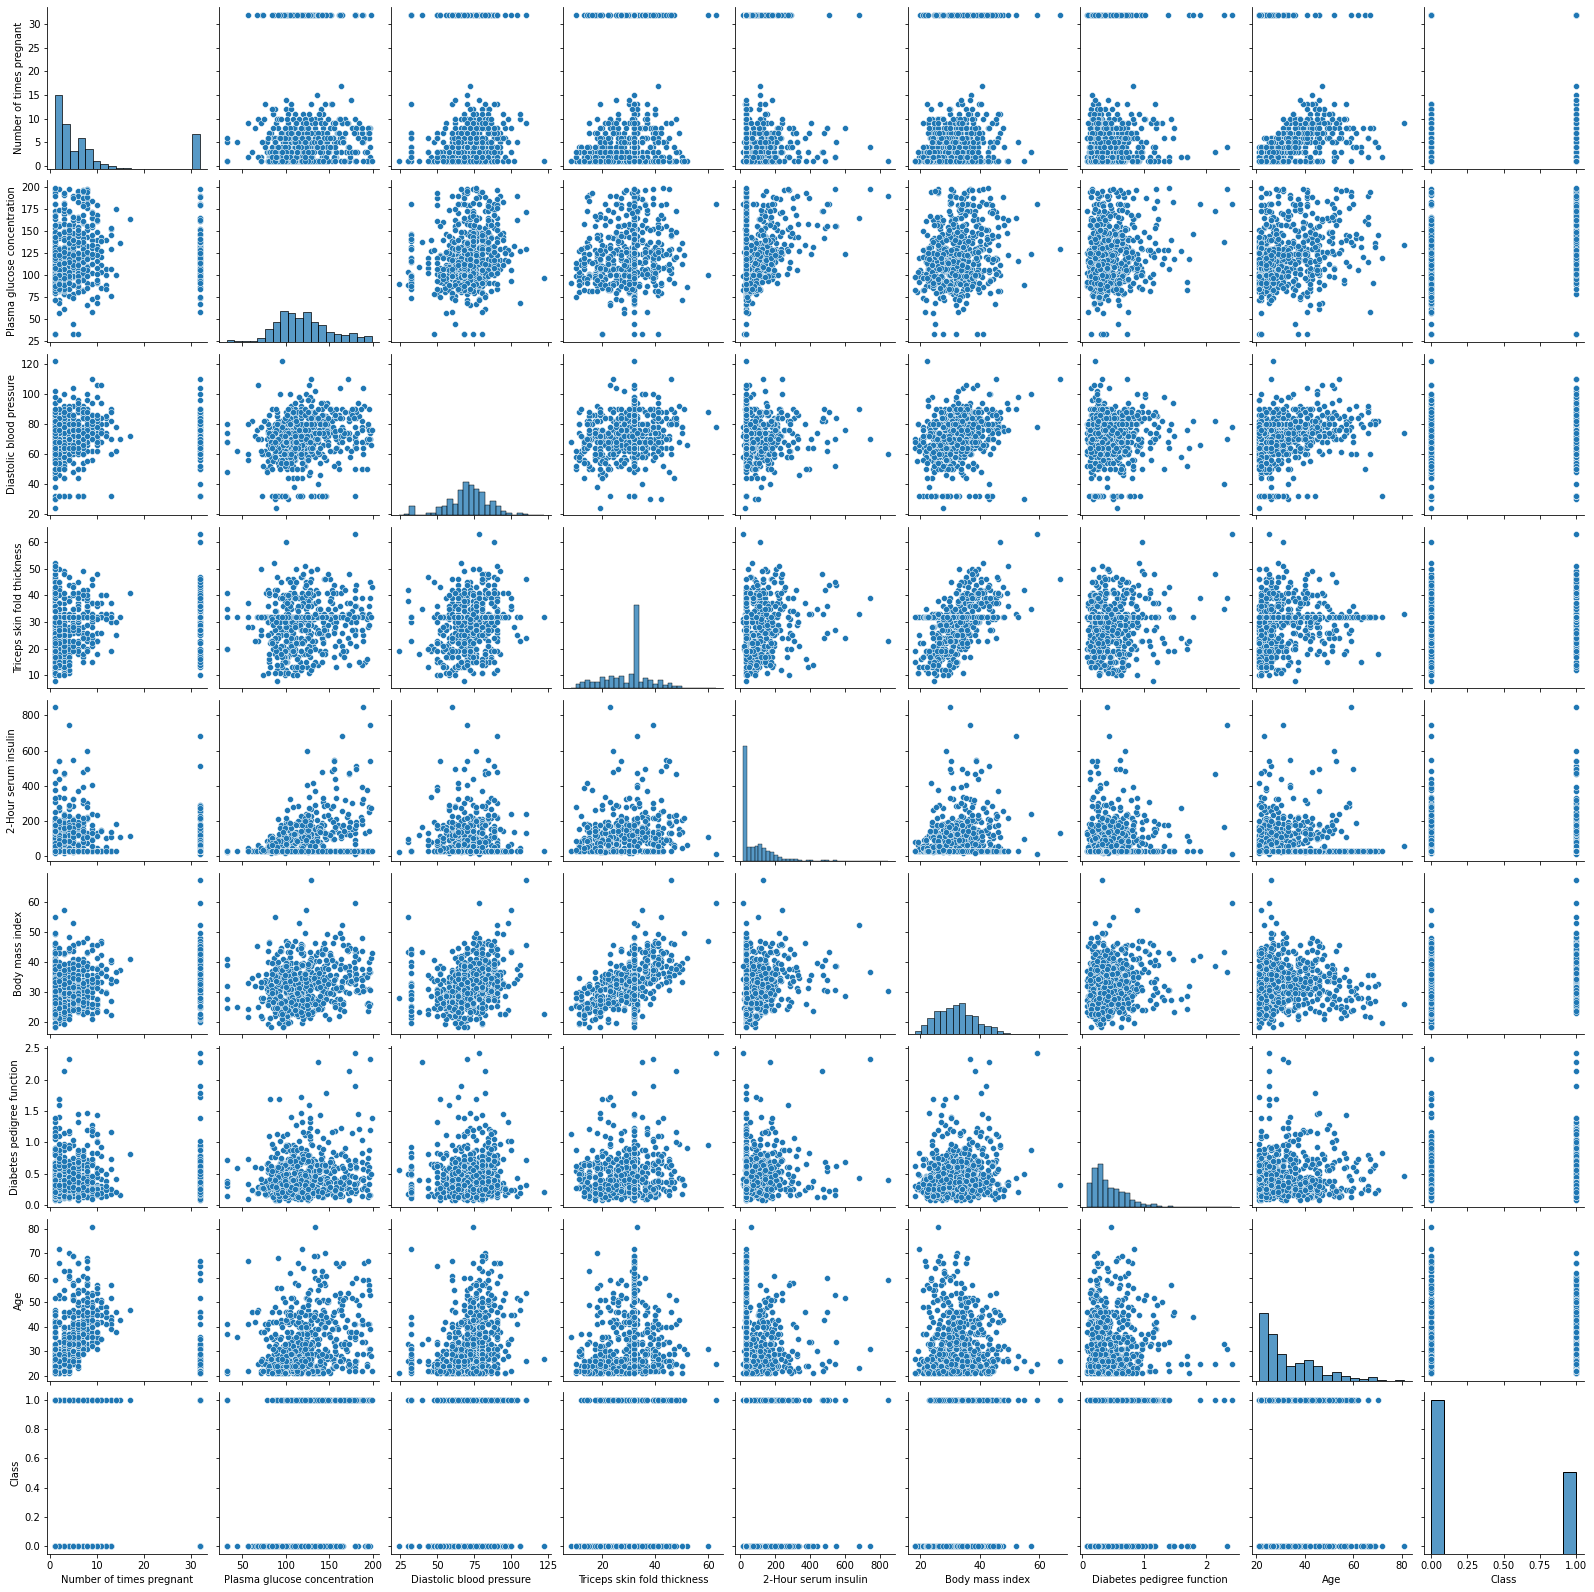

In [ ]:
sns.pairplot(X_train.join(y_train), kind="scatter")

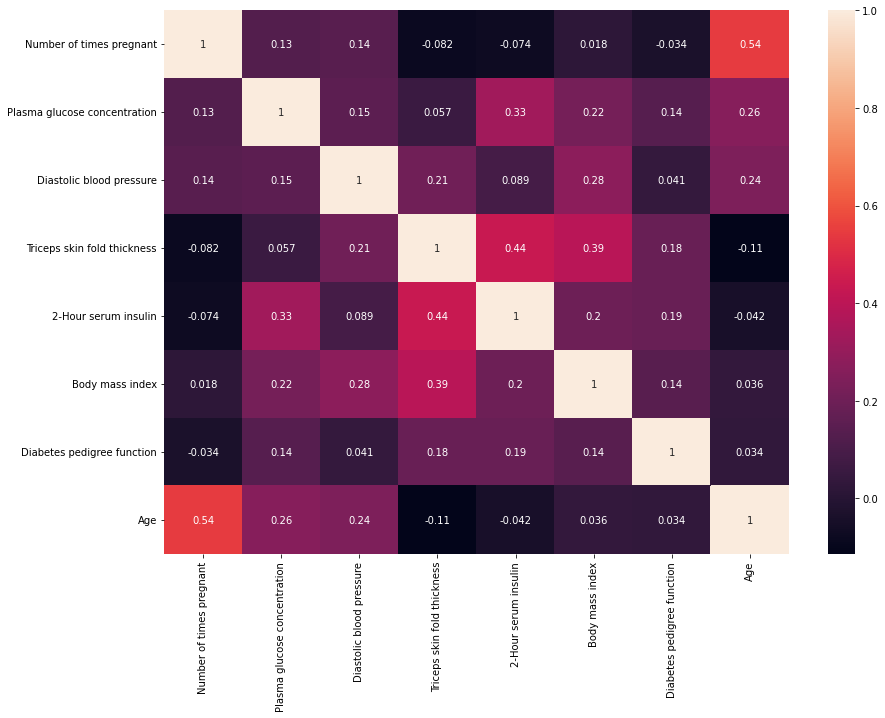

In [ ]:
# Sprawdzenie korelacji pomiędzy kolumnami przez Heat-map

plt.rcParams["figure.figsize"] = [14, 10]
sns.heatmap(ddf.corr(), annot=True)

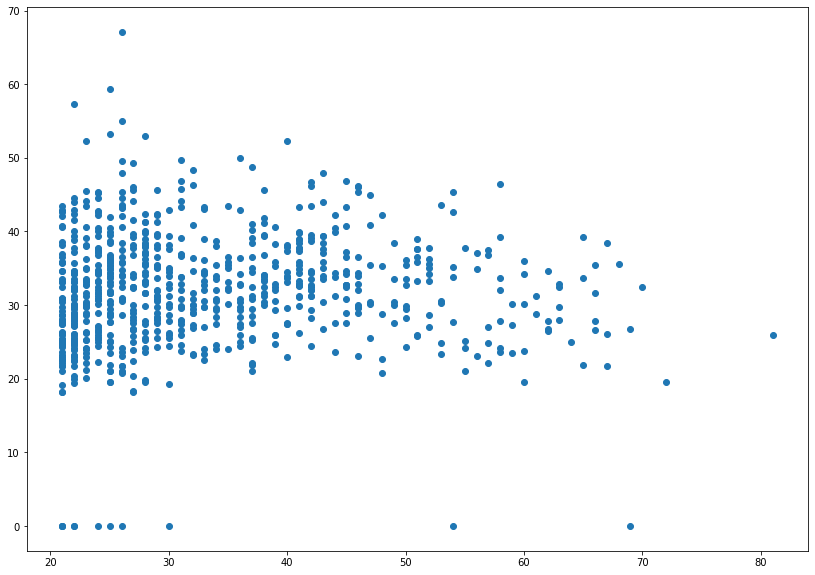

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=ddf['Age'],y=ddf['Body mass index'])
ax.plot()
plt.show()

In [ ]:
# ddf.replace(to_replace = 0.0, value = ddf['Body mass index'].mean(), inplace=True)
# ddf.replace(to_replace = 0.0, value = ddf['Body mass index'].mean(), inplace=True)

ddf

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,negative
764,2,122,70,27,0,36.8,0.340,27,negative
765,5,121,72,23,112,26.2,0.245,30,negative
766,1,126,60,0,0,30.1,0.349,47,positive


In [ ]:
imp_mean = SimpleImputer(missing_values=0, strategy='median')
c = ['Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Diabetes pedigree function','Age']
ddf1 = pd.DataFrame(imp_mean.fit_transform(ddf[c]), columns=c)

In [ ]:
ddf1

,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,125.0,30.1,0.349,47.0


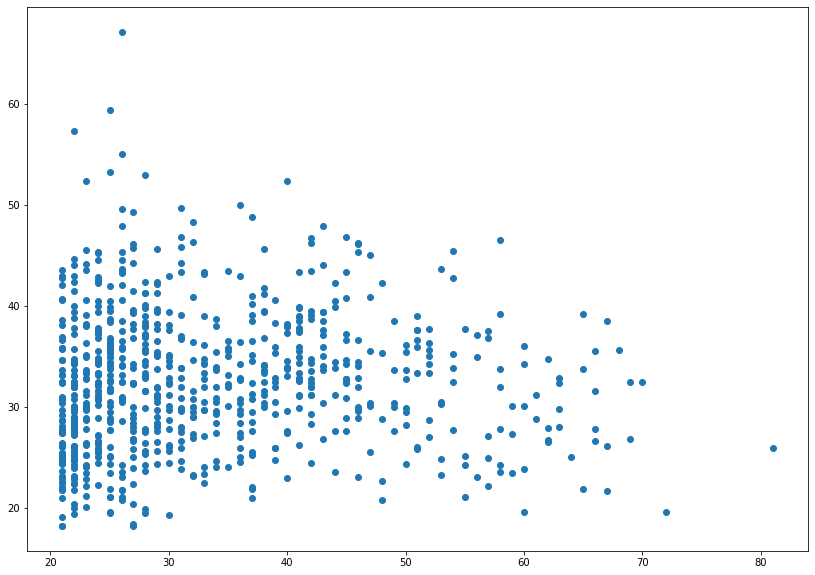

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=ddf1['Age'],y=ddf1['Body mass index'])
ax.plot()
plt.show()

In [ ]:
# ddf_dummies_class = pd.get_dummies(ddf['Class'], drop_first=True)
ddf2 = pd.concat([ddf['Class'], ddf1], axis=1)
ddf2


,Class,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,positive,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,negative,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,positive,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,negative,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,positive,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,negative,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,negative,122.0,70.0,27.0,125.0,36.8,0.340,27.0
765,negative,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,positive,126.0,60.0,29.0,125.0,30.1,0.349,47.0


In [ ]:
from sklearn.model_selection import train_test_split

X = ddf2.drop('Class', axis=1) # zmienne niezależne (features)
y = ddf2['Class'] # zmienna zależna (target)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train dimension= ", X_train.shape)
print("X_test dimension= ", X_test.shape)
print("y_train dimension= ", y_train.shape)
print("y_train dimension= ", y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
                                                    


X_train dimension=  (614, 7)
X_test dimension=  (154, 7)
y_train dimension=  (614,)
y_train dimension=  (154,)


In [ ]:
ddf2.head()


,Class,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,positive,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,negative,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,positive,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,negative,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,positive,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):  
    # accuracy = accuracy_score(target, prediction) - dysproporcja pomiędzy Class =0 a Class= 1 ; zalecane balanced_accuracy
    balanced_accuracy = balanced_accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    
    fprs, tprs, thress = roc_curve(y_test, y_pred)
    roc_auc = auc(fprs, tprs)
    
    return balanced_accuracy, precision, recall, f1, mislabeled, total


def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Balanced Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print(f'  Roc_Auc: {metrics[6]}')
    print('\n')

In [ ]:
# Train a linear SVM
svm = SVC(C = 1.0, kernel="poly")
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)
print_results(calculate_metrics(y_train, y_pred_train), 'svm')

NameError: ignored